In [48]:
!pip install tensorflow scikit-learn matplotlib seaborn --quiet

In [49]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [50]:
digits = datasets.load_digits()
X = digits.images  # shape: (1797, 8, 8)
y = digits.target  # shape: (1797,)

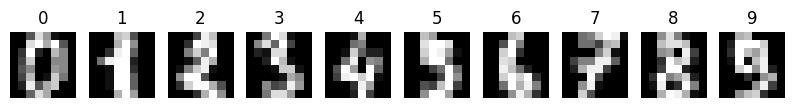

In [51]:
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X[i], cmap='gray')
    plt.title(y[i])
    plt.axis('off')
plt.show()

In [52]:
X = X / 16.0  # Original pixel values are from 0 to 16

In [53]:
X = X.reshape(-1, 8, 8, 1)

In [54]:
y_cat = to_categorical(y, num_classes=10)


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

In [57]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(8, 8, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')  # 10 classes
])

In [58]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [59]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)


Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.2635 - loss: 2.2238 - val_accuracy: 0.8056 - val_loss: 1.9236
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7094 - loss: 1.7598 - val_accuracy: 0.8264 - val_loss: 1.1962
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7821 - loss: 1.0699 - val_accuracy: 0.9028 - val_loss: 0.6390
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8665 - loss: 0.6264 - val_accuracy: 0.9236 - val_loss: 0.3922
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8977 - loss: 0.4486 - val_accuracy: 0.9306 - val_loss: 0.2997
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9029 - loss: 0.3716 - val_accuracy: 0.9375 - val_loss: 0.2431
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9172 - loss: 0.3076 - val_accuracy: 0.9583 - val_loss: 0.1972
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9393 - loss: 0.2364 - val_accuracy: 0.9722 - val_loss

In [60]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9855 - loss: 0.0627 

Test Accuracy: 0.9750


In [61]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


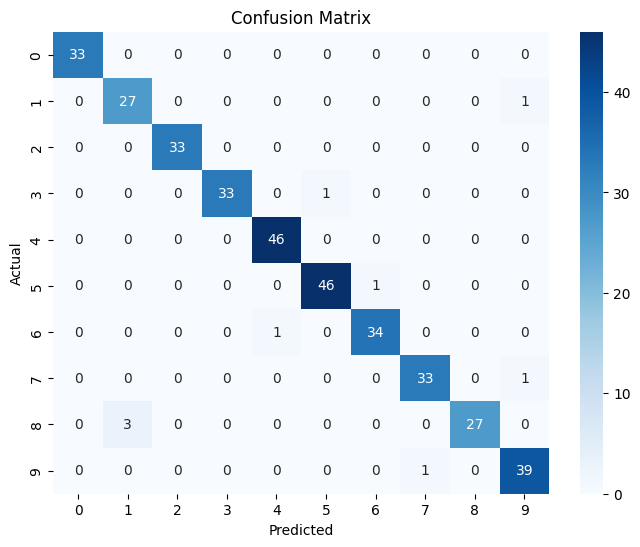

In [62]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_true_classes, y_pred_classes), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [63]:
print("\nClassification Report:\n")
print(classification_report(y_true_classes, y_pred_classes))


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.90      0.96      0.93        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       0.98      1.00      0.99        46
           5       0.98      0.98      0.98        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.90      0.95        30
           9       0.95      0.97      0.96        40

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.97       360
weighted avg       0.98      0.97      0.98       360

